In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,auc

import joblib

import seaborn as sns

In [7]:
data_path = r"C:\Users\ADMIN\Downloads\pima.csv"
df = pd.read_csv(data_path, header=None)

df.columns = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"
]

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [10]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
param_grid = {
    'hidden_layer_sizes': [(8,8), (16,8), (16,16)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.01]
}

mlp = MLPClassifier(max_iter=500, random_state=42)

grid = GridSearchCV(
    mlp,
    param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train_scaled, y_train)


,estimator,MLPClassifier...ndom_state=42)
,param_grid,"{'activation': ['relu', 'tanh'], 'alpha': [0.0001, 0.01], 'hidden_layer_sizes': [(8, ...), (16, ...), ...], 'solver': ['adam']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,hidden_layer_sizes,"(8, ...)"


In [12]:
best_model = grid.best_estimator_

y_pred = best_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7272727272727273

Confusion Matrix:
 [[81 19]
 [23 31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.81      0.79       100
           1       0.62      0.57      0.60        54

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154



In [13]:
joblib.dump(best_model, "trained_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully.")


Model and scaler saved successfully.


In [14]:
def predict_diabetes(input_data):
    """
    input_data: list of 8 clinical values
    """
    input_scaled = scaler.transform([input_data])
    prediction = best_model.predict(input_scaled)[0]
    
    if prediction == 1:
        return "Diabetes Detected"
    else:
        return "No Diabetes Detected"


In [15]:
sample_patient = [2, 120, 70, 20, 85, 28.0, 0.45, 35]
predict_diabetes(sample_patient)


C:\Users\ADMIN\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'No Diabetes Detected'

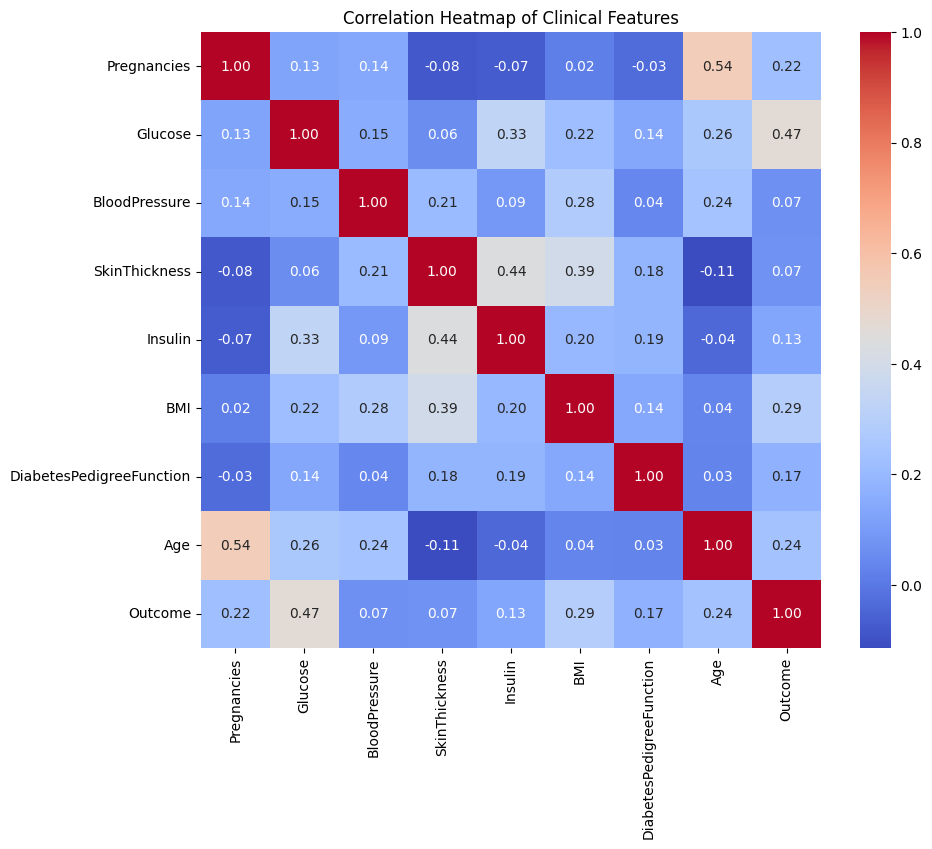

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Clinical Features")
plt.show()


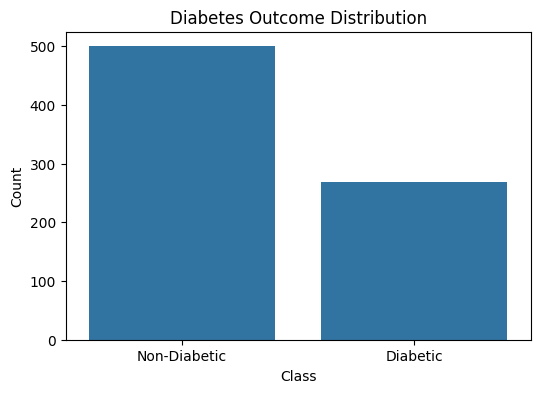

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Outcome", data=df)
plt.xticks([0, 1], ["Non-Diabetic", "Diabetic"])
plt.title("Diabetes Outcome Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


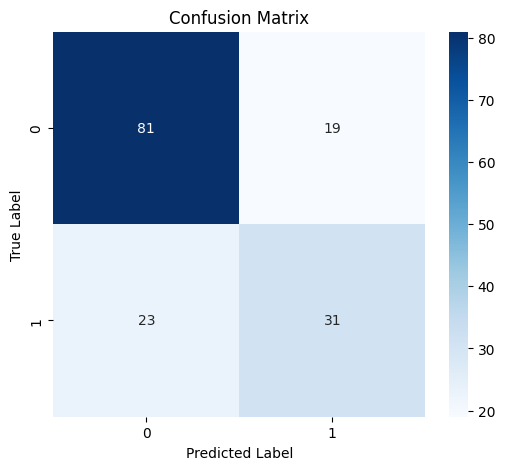

In [18]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


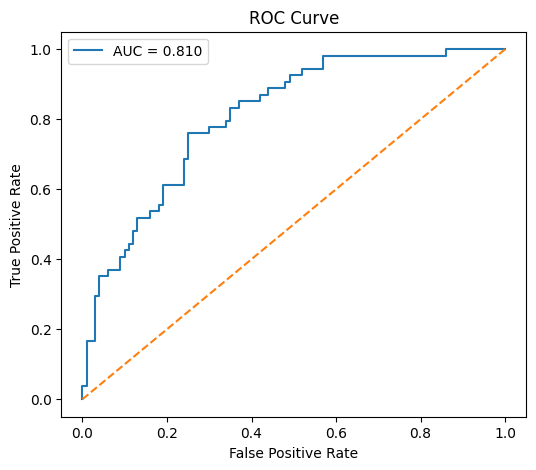

In [19]:
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
